In [1]:
# EDA_Churn.ipynb
# Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)



In [2]:
# Charger le dataset
df = pd.read_csv('Data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:


# Aperçu structure
print("Dimensions :", df.shape)
print("\nTypes des colonnes :\n", df.dtypes)
print("\nStatistiques descriptives :\n", df.describe())
print("\nValeurs manquantes par colonne :\n", df.isnull().sum())


Dimensions : (7043, 21)

Types des colonnes :
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Statistiques descriptives :
        SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000 

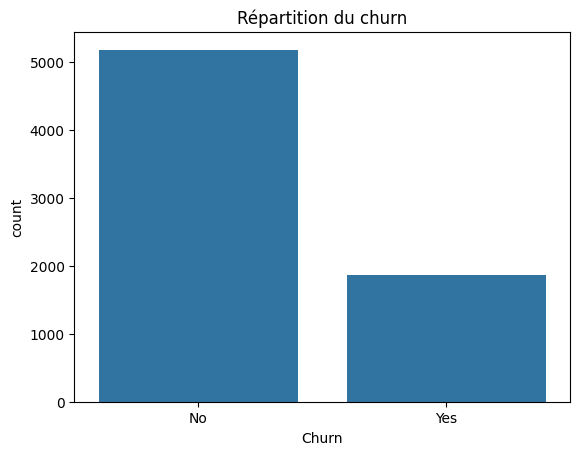


Pourcentage de chaque classe :
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [4]:
# Analyse de la target
sns.countplot(x='Churn', data=df)
plt.title("Répartition du churn")
plt.show()
print("\nPourcentage de chaque classe :\n", df['Churn'].value_counts(normalize=True)*100)


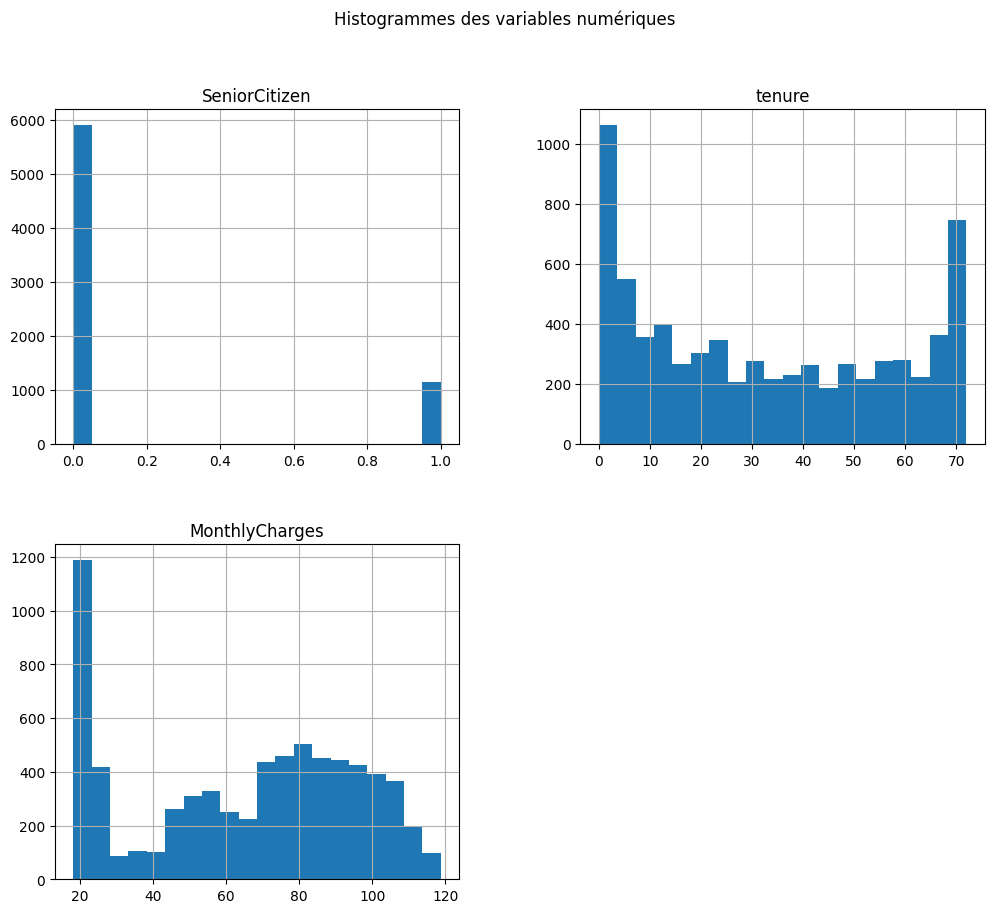

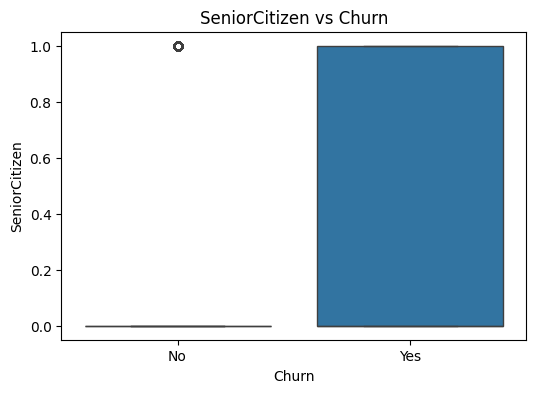

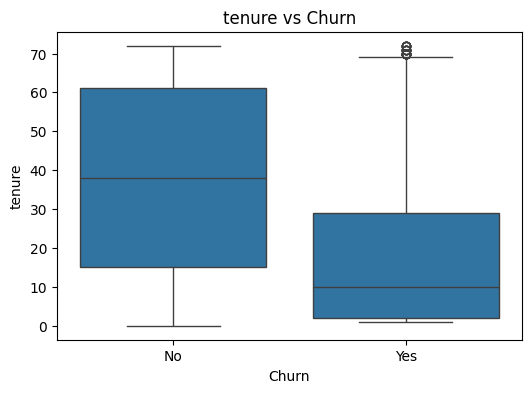

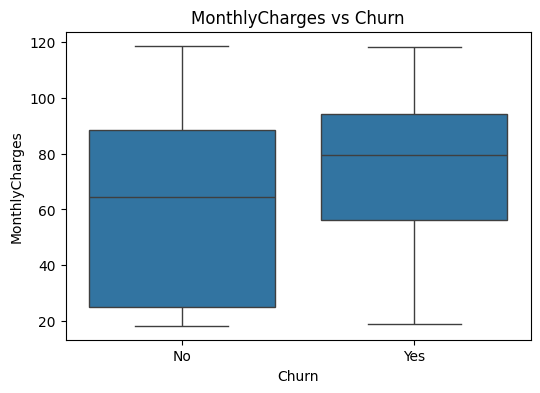

In [5]:

# Features numériques (exclure la target Churn)
numeric_features = [col for col in df.select_dtypes(include=['int64','float64']).columns if col != 'Churn']

# Histogrammes des variables numériques
df[numeric_features].hist(figsize=(12,10), bins=20)
plt.suptitle("Histogrammes des variables numériques")
plt.show()

# Boxplots pour détecter les outliers
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()


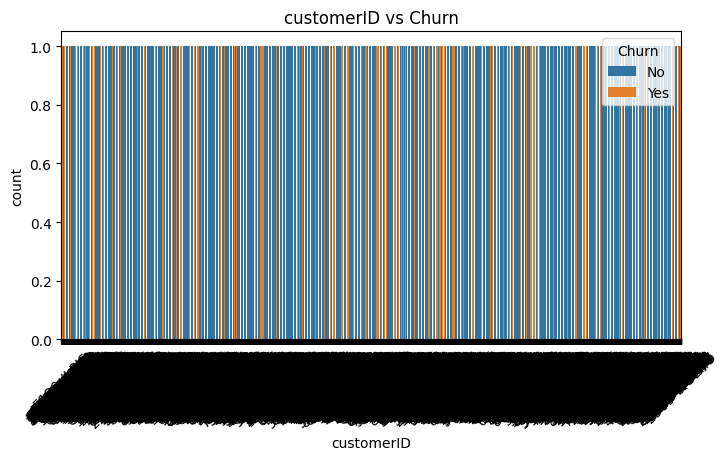

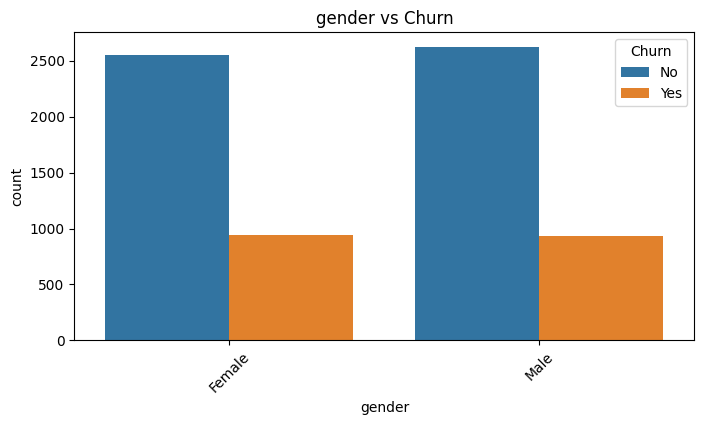

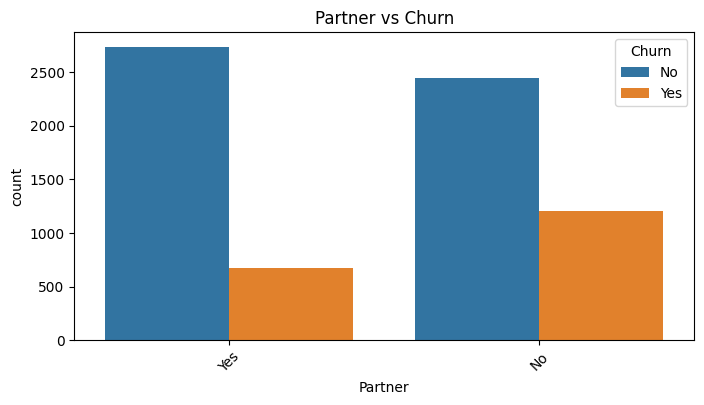

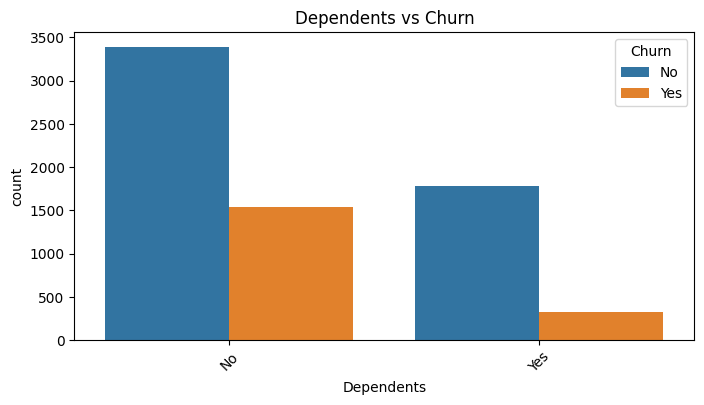

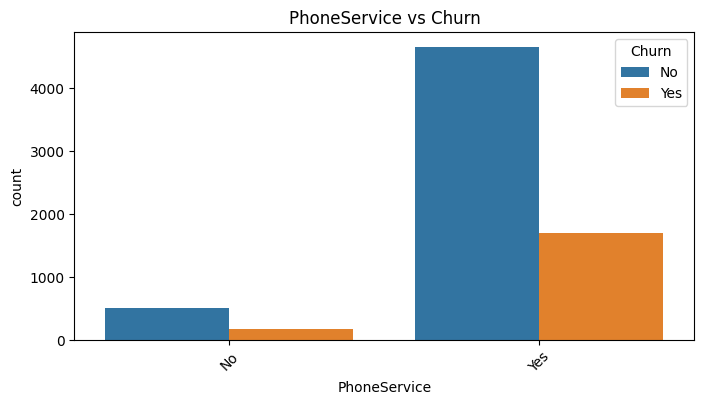

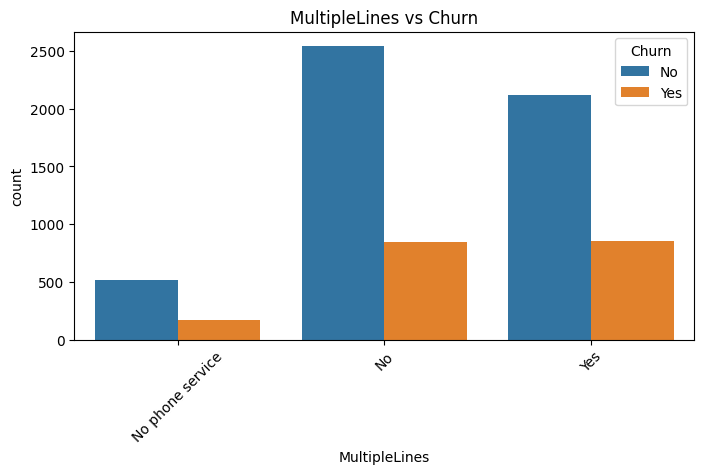

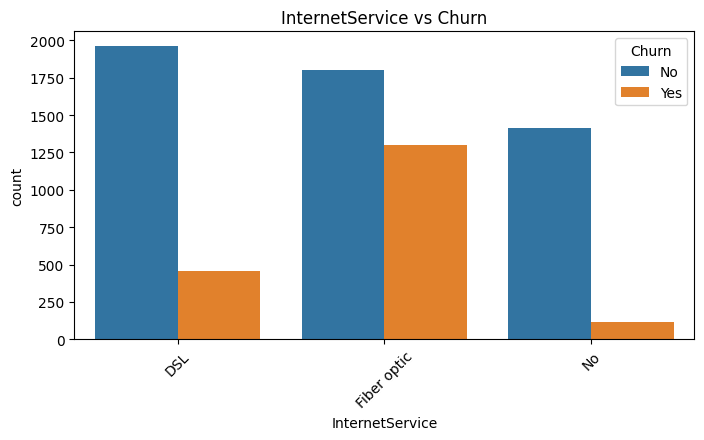

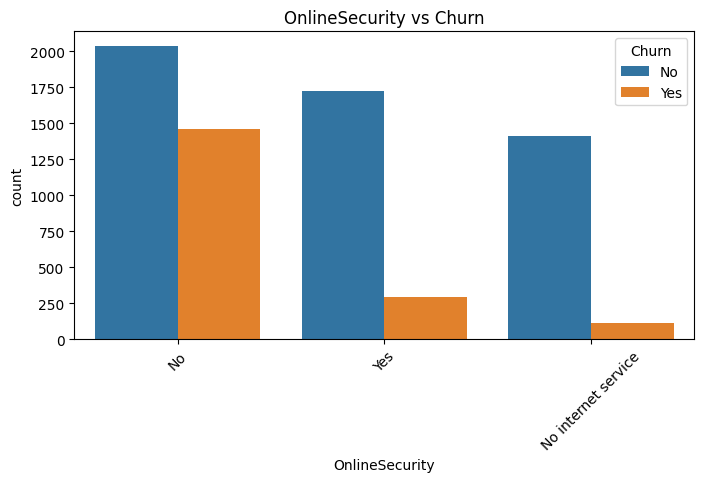

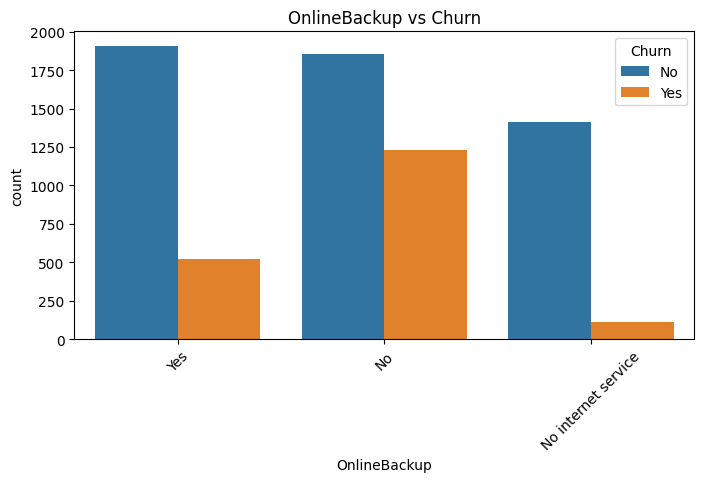

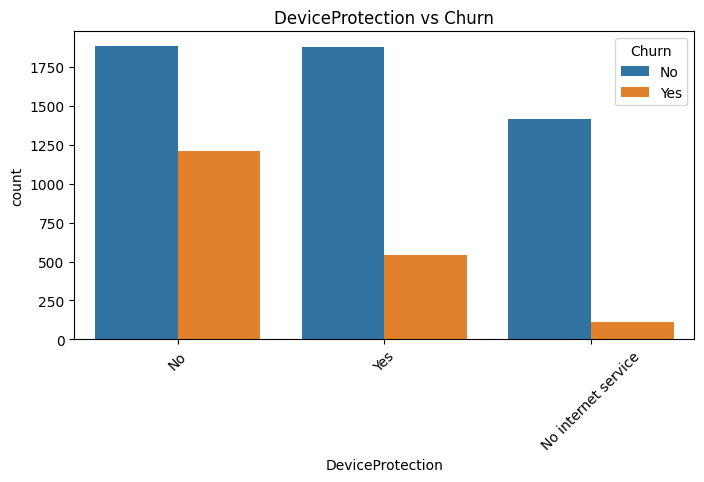

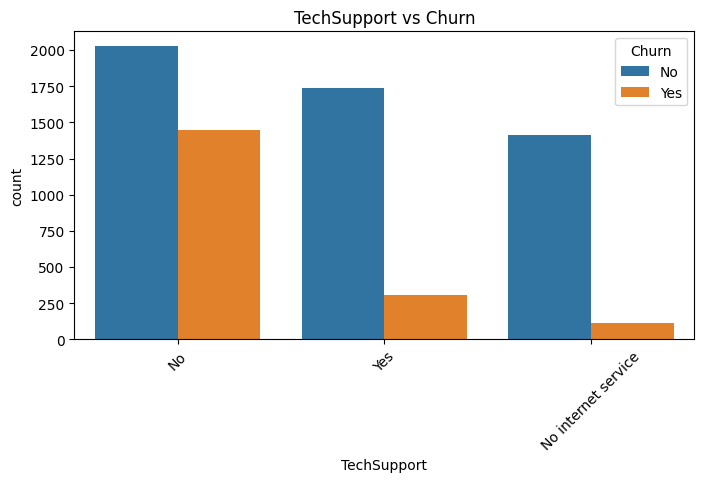

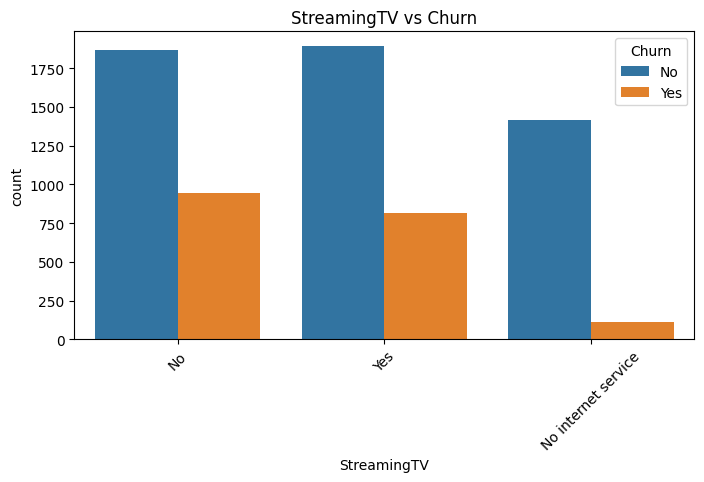

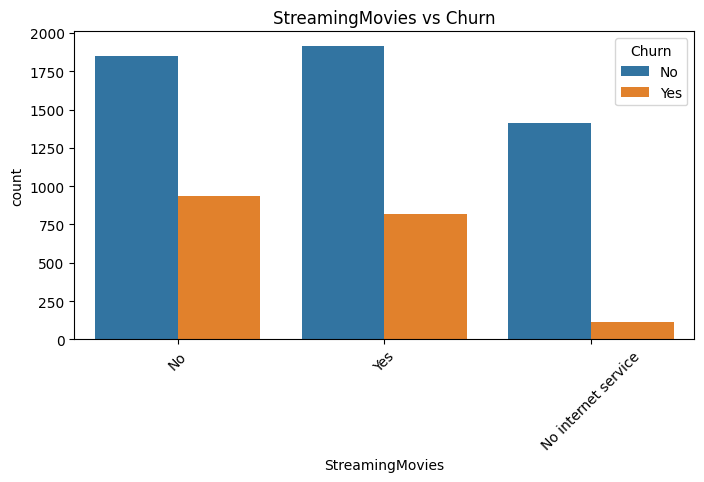

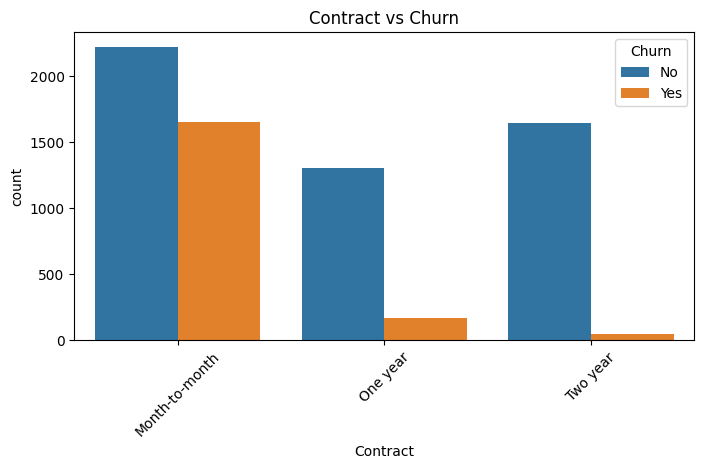

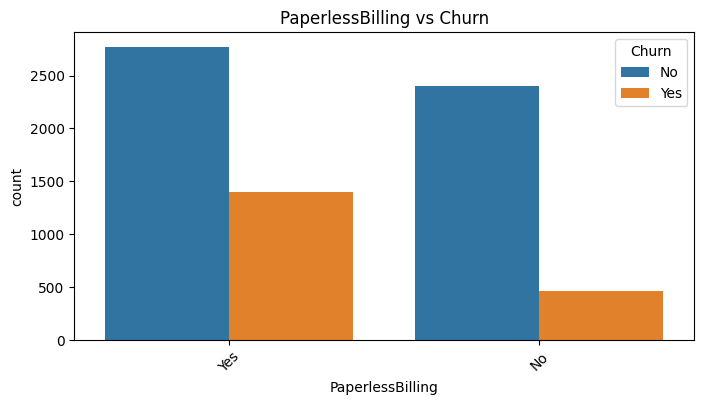

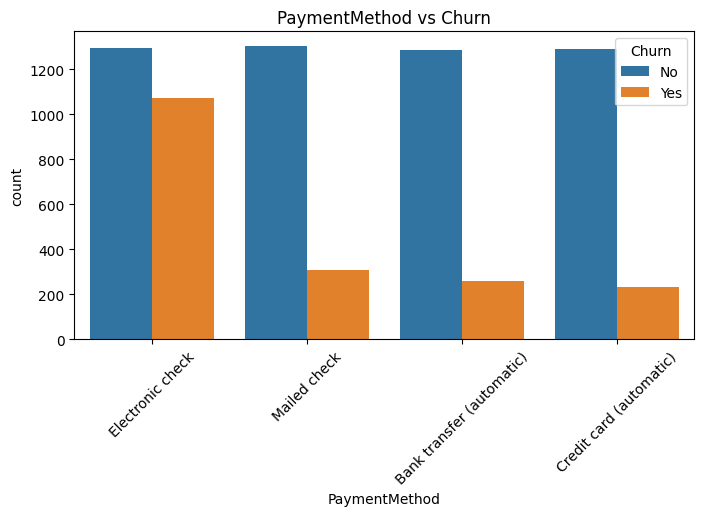

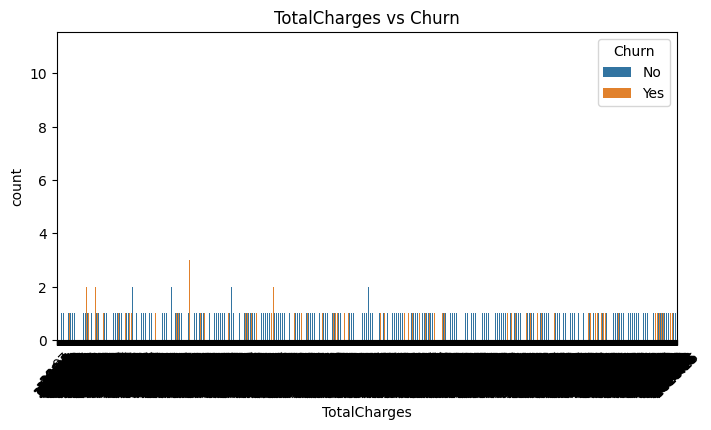

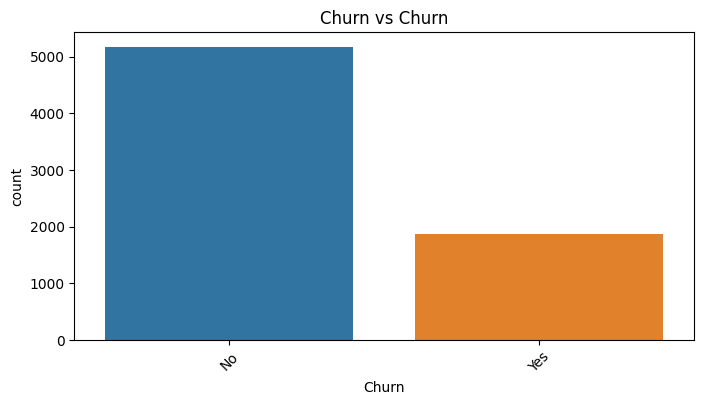

In [6]:
# Features catégorielles
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()



In [7]:

# Corrélations
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap des corrélations")
plt.show()


ValueError: could not convert string to float: '7590-VHVEG'

<Figure size 1200x1000 with 0 Axes>

In [ ]:
# Sélection des colonnes numériques uniquement
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Heatmap de corrélations numériques
plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap des corrélations")
plt.show()

# Corrélations avec la target
if 'Churn' in numeric_features:
    corr_target = df[numeric_features].corr()['Churn'].sort_values(ascending=False)
    print("\nCorrélations des variables numériques avec la target Churn :\n", corr_target)
else:
    print("Attention : la variable cible 'Churn' n'est pas numérique et ne peut pas être incluse dans la corrélation.")


In [ ]:
# Copier le dataframe pour ne pas toucher à l'original
df_encoded = df.copy()

# Encoder toutes les colonnes non numériques
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Maintenant toutes les colonnes sont numériques 
numeric_features = df_encoded.columns.tolist()

# Heatmap complète
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded[numeric_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap des corrélations (avec variables encodées)")
plt.show()

# Corrélations avec la target
corr_target = df_encoded.corr()['Churn'].sort_values(ascending=False)
print("\nCorrélations des variables avec la target Churn :\n", corr_target)
